In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [50]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/heart failur classification dataset.csv')
data.head(5)

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,75.0,0,582,0,20,1,265000.00,1.9,NaN,Male,No,4.0,1
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,Male,No,6.0,1
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.0,Male,Yes,7.0,1
3,3,50.0,1,111,0,20,0,210000.00,1.9,137.0,Male,No,7.0,1
4,4,65.0,1,160,1,20,0,327000.00,2.7,116.0,Female,No,8.0,1


In [51]:
data.isnull().sum()

Unnamed: 0                  0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                6
sex                         0
smoking                     0
time                        7
DEATH_EVENT                 0
dtype: int64

In [52]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(data[['serum_sodium']])

data['serum_sodium'] = impute.transform(data[['serum_sodium']])
impute.fit(data[['time']])

data['time'] = impute.transform(data[['time']])
data.isnull().sum()

Unnamed: 0                  0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [53]:
data.head(5)

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,75.0,0,582,0,20,1,265000.00,1.9,136.675768,Male,No,4.0,1
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.000000,Male,No,6.0,1
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.000000,Male,Yes,7.0,1
3,3,50.0,1,111,0,20,0,210000.00,1.9,137.000000,Male,No,7.0,1
4,4,65.0,1,160,1,20,0,327000.00,2.7,116.000000,Female,No,8.0,1


In [54]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

data['sex_enc'] = enc.fit_transform(data['sex'])
data['smoking_enc'] = enc.fit_transform(data['smoking'])


data.head(5)

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,sex_enc,smoking_enc
0,0,75.0,0,582,0,20,1,265000.00,1.9,136.675768,Male,No,4.0,1,1,0
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.000000,Male,No,6.0,1,1,0
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.000000,Male,Yes,7.0,1,1,1
3,3,50.0,1,111,0,20,0,210000.00,1.9,137.000000,Male,No,7.0,1,1,0
4,4,65.0,1,160,1,20,0,327000.00,2.7,116.000000,Female,No,8.0,1,0,0


In [55]:
X = data.drop(['sex','smoking','sex_enc','smoking_enc'], axis = 1)


In [56]:
X.head(5)

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,0,75.0,0,582,0,20,1,265000.00,1.9,136.675768,4.0,1
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.000000,6.0,1
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.000000,7.0,1
3,3,50.0,1,111,0,20,0,210000.00,1.9,137.000000,7.0,1
4,4,65.0,1,160,1,20,0,327000.00,2.7,116.000000,8.0,1


In [57]:
Y= data.sex_enc

In [58]:
Y.head(5)

0    1
1    1
2    1
3    1
4    0
Name: sex_enc, dtype: int64

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [60]:
model = LogisticRegression()

model.fit(x_train, y_train) 
predictions = model.predict(x_test)
print(predictions)

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [61]:
LR_Accuracy = accuracy_score(y_test, predictions)
print(LR_Accuracy)

0.6666666666666666


In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score=accuracy_score(y_pred,y_test)
DT_Accuracy=score
print(DT_Accuracy)

0.5666666666666667


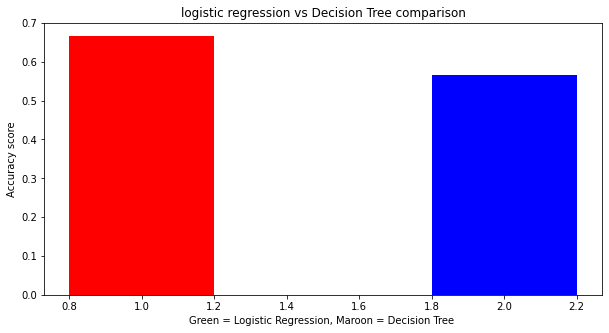

In [64]:
import numpy as np 
import matplotlib.pyplot as plt  
  
   
# creating the dataset 

   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(1, LR_Accuracy, color ='red',  
        width = 0.4) 
plt.bar(2,DT_Accuracy, color ='blue',  
        width = 0.4) 
  
plt.xlabel("Green = Logistic Regression, Maroon = Decision Tree ") 
plt.ylabel("Accuracy score") 
plt.title("logistic regression vs Decision Tree comparison") 
plt.show()
